Utilizaremos un set de datos de las policias de New York del año 2009 y
2010. (2009_1perc.csv y 2010_1perc.csv) los cuales nos darán información
de los procedimientos policiales realizados. Además se le entregará el
diccionario de variables para que pueda consultar que significa cada
categoría dentro de las variables.
● La variable respuesta 'arstmade' informa si los procedimientos policiales
han terminado en arresto o no, y el objetivo será realizar un modelo de
Machine Learning para predecir si un futuro procedimiento terminará en
arresto.
1.- Enliste todas las librerias que utilizará
Nota: Se recomienda ir actualizando la lista conforme las necesidades vaya
teniendo durante el desarrollo de la prueba
2.- Importación y revisión de los datos
Importe ambos sets. Dado que la fuente de datos proviene de la misma base,
tienen las mismas columnas. Consolide ambos sets y reporte una
exploración básica de los datos (numero de filas/columnas, tipos de datos,
estadísticas básicas, casos perdidos)
3.- Preprocesamiento de datos
Habrá notado que los datos parecen tener ciertas inconsistencias. Siga los
siguientes pasos para limpiar este set:
● 3.1 Obtenga una lista con todas las variables categoricas que tengan entre
2 y 99 categorías (inclusive). (hint: son las variables tipo categoricas
● 3.2 Reemplaze las siguientes clases faltantes:
-Si alguna categoría de las columnas officrid, offshld o offverb es igual a ""
cambielo a 'N' y en caso contrario dejelo como 'Y'

-Si alguna categoría de las columnas sector, trhsloc o beat es igual a "" (o NA,
dependiendo de como haya catgado la base de datos), cambielo a 'U' y en caso
contrario mantenga su valor
Nota, los valores significan {N: No, Y: Yes, U: Unknown}
● 3.3 Transforme las columnas ht_feet junto con ht_inch en una única
columna (de la forma "ht_feet.ht_inch") llamado 'meters' (hint: transforme
con el siguiente cálculo: metros = (pies+pulgadas)*0.3048)
● 3.4 Note que la fecha viene en un formato MMDDAAAA en la columna
datestop. Genere 2 nuevas columnas llamadas month y year que solo
tenga el mes y el año respectivamente.
Hint: Explore la libreria lubridate https://www.rstudio.com/resources/cheatsheets/
● 3.5 Filtre su DataFrame y solo deje las columnas seleccionadas en el punto
3.1, el mes, el año, los metros y la edad. Luego solo deje los registros cuyas
edades esten entre 18 y 100 años, ambos inclusive.
4.- Análisis exploratorio
● 4.1 Estudie la variable respuesta por si sola (arstmade), puede ayudarse
de un gráfico. Comente
● 4.2.- Estudie la relación de la variable respuesta en comportamiento con la
raza (race), comente.
● 4.3 Estudie la relación de la variable respuesta en comportamiento con la
sexo (sex), comente.
● 4.3 Estudie la relación de la variable respuesta en comportamiento con la
sexo y la edad en su conjunto, comente.
● 4.4 Recodifique la variable respuesta a 1 y 0. Donde 0 es N y 1 es Y
● 4.5 Muestre en un gráfico la probabilidad que un individuo sea
arrestado,condicional al género y a la raza. ¿qué implicancias éticas tienen
algunas conclusiones de lo que observa?.
5.- Determinar si el procedimiento policial concluirá en alguna acción violenta.
Los atributos que tienen el prefijo pf (['pf_hands'],['pf_wall'], ['pf_grnd'],
['pf_drwep'], ['pf_ptwep'],['pf_baton'],['pf_hcuff'], ['pf_pepsp'] y ['pf_other']) indican
si hubo fuerza fisica utilizada por el oficial al momento del procedimiento, con la
marca 'Y'.
Genere una nueva variable llamada 'violencia' la cual sea 1 si en cualquiera de
las 9 variables pf hubo alguna 'Y', y 0 en otro caso. Luego indique el porcentaje
de casos que terminaron con violencia.
6.- Modelación
● 6.1 Genere las variables dummies correspondientes (Tenga cuidado de no
utilizar variables que expliquen lo mismo, ¡recuerde que acaba de crear
una variable a partir de otras!, además recuerde que creó una variable
numérica que es una categoría :) ). Luego genere los sets de train-test
utilizando el año 2009 para entrenar, y el año 2010 para testear.

● 6.2 Entrene 2 modelos de clasificación y reporte el mejor modelo bajo algún
criterio.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV

In [2]:
# 2 - Carga de datos

df_2009 = pd.read_csv("2009_1perc.csv")
df_2010 = pd.read_csv("2010_1perc.csv")

In [5]:
# 3 - Análisis exploratorio de datos
print(df_2009.info())
print(df_2010.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5812 entries, 0 to 5811
Columns: 112 entries, Unnamed: 0 to detailcm
dtypes: float64(1), int64(19), object(92)
memory usage: 5.0+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6013 entries, 0 to 6012
Columns: 112 entries, Unnamed: 0 to detailcm
dtypes: int64(17), object(95)
memory usage: 5.1+ MB
None


In [6]:
print(df_2009.describe())
print(df_2010.describe())

          Unnamed: 0    year          pct       ser_num      datestop   
count    5812.000000  5812.0  5812.000000   5812.000000  5.812000e+03  \
mean   291666.632485  2009.0    69.051617   5769.119924  6.255350e+06   
std    167435.992474     0.0    32.846903   5524.955522  3.447243e+06   
min        52.000000  2009.0     1.000000      1.000000  1.012009e+06   
25%    147489.750000  2009.0    42.000000   1902.750000  3.172009e+06   
50%    292821.500000  2009.0    73.000000   4347.000000  6.142009e+06   
75%    436008.750000  2009.0   102.000000   7616.750000  9.192009e+06   
max    580847.000000  2009.0   123.000000  31694.000000  1.231201e+07   

          timestop       perobs      perstop  compyear  comppct       repcmd   
count  5812.000000  5812.000000  5812.000000    5812.0   5812.0  5812.000000  \
mean   1426.219202     2.665893     5.501893       0.0      0.0   252.115795   
std     736.239726     4.816704     5.922592       0.0      0.0   305.058678   
min       0.000000    

In [7]:
# 4 - Preparación de los datos

print(df_2009.isna().sum())

print(df_2010.isna().sum())

Unnamed: 0    0
year          0
pct           0
ser_num       0
datestop      0
             ..
xcoord        0
ycoord        0
dettypcm      0
linecm        0
detailcm      0
Length: 112, dtype: int64
Unnamed: 0    0
year          0
pct           0
ser_num       0
datestop      0
             ..
xcoord        0
ycoord        0
dettypcm      0
linecm        0
detailcm      0
Length: 112, dtype: int64


In [8]:
#Comparar tipos de datos de df's
# Obtener los tipos de datos de cada DataFrame
dtypes1 = df_2009.dtypes
dtypes2 = df_2010.dtypes

# Comparar los tipos de datos columna por columna
diferentes = []
for columna in dtypes1.index:
    if dtypes1[columna] != dtypes2[columna]:
        diferentes.append(columna)

# Imprimir las columnas con tipos de datos diferentes
if len(diferentes) == 0:
    print("Los tipos de datos son iguales en todas las columnas.")
else:
    print("Los tipos de datos son diferentes en las siguientes columnas:")
    for columna in diferentes:
        print(columna)

Los tipos de datos son diferentes en las siguientes columnas:
perobs
addrpct
linecm
detailcm


In [9]:
#Revisar el tipo de datos de variables no coincidentes
print(f"perobs 2009: {df_2009['perobs'].dtype}, perobs 2010: {df_2010['perobs'].dtype}")
print(f"addrpct 2009: {df_2009['addrpct'].dtype}, addrpct 2010: {df_2010['addrpct'].dtype}")
print(f"linecm 2009: {df_2009['linecm'].dtype}, linecm 2010: {df_2010['linecm'].dtype}")
print(f"detailcm 2009: {df_2009['detailcm'].dtype}, detailcm 2010: {df_2010['detailcm'].dtype}")

#Transformar todas las variables diferentes


perobs 2009: float64, perobs 2010: int64
addrpct 2009: int64, addrpct 2010: object
linecm 2009: int64, linecm 2010: object
detailcm 2009: int64, detailcm 2010: object


In [10]:
df_2009['perobs'] = df_2009['perobs'].astype(object)
df_2010['perobs'] = df_2010['perobs'].astype(object)
df_2009['addrpct'] = df_2009['addrpct'].astype(object)
df_2010['addrpct'] = df_2010['addrpct'].astype(object)
df_2009['linecm'] = df_2009['linecm'].astype(object)
df_2010['linecm'] = df_2010['linecm'].astype(object)
df_2009['detailcm'] = df_2009['detailcm'].astype(object)
df_2010['detailcm'] = df_2010['detailcm'].astype(object)

In [11]:
# consolidacion de los dos dataframes

df = pd.concat([df_2009, df_2010], ignore_index=True)

In [12]:
# a numericos
df['perobs'] = pd.to_numeric(df["perobs"], errors='coerce')
df['addrpct'] = pd.to_numeric(df['addrpct'], errors='coerce')
df['linecm'] = pd.to_numeric(df['linecm'], errors='coerce')
df['detailcm'] = pd.to_numeric(df['detailcm'], errors='coerce')

In [14]:
# 3.1 Obtenga una lista con todas las variables categoricas entre 2 y 99

categoricas = df.select_dtypes(include=['object'])


In [16]:
valores_distintos = categoricas.nunique()
valores_distintos[(valores_distintos > 2) & (valores_distintos < 99)]

#crea una lista
lista_var_cat = list(valores_distintos[(valores_distintos > 2) & (valores_distintos < 99)].index)

print('Entre 2 y 99 categorías: ', lista_var_cat)




Entre 2 y 99 categorías:  ['trhsloc', 'typeofid', 'sex', 'race', 'haircolr', 'eyecolor', 'build', 'city', 'sector', 'beat']


In [17]:
#3.2 Reemplaze las siguientes clases faltantes:
# -Si alguna categoría de las columnas officrid, offshld o offverb es igual a ""
# cambielo a 'N' y en caso contrario dejelo como 'Y'

df["offverb"].fillna('N', inplace = True)
df["offverb"].replace(" ", 'N', inplace = True)
df["offverb"].replace("V", 'Y', inplace = True)
df["offshld"].fillna('N', inplace = True)
df["offshld"].replace(" ", 'N', inplace = True)
df["offshld"].replace("S", 'Y', inplace = True)
df["officrid"].fillna('N', inplace = True)
df["officrid"].replace(" ", 'N', inplace = True)
df["officrid"].replace("I", 'Y', inplace = True)

print(df["offverb"].value_counts())
print(df["offshld"].value_counts())
print(df["officrid"].value_counts())
# -Si alguna categoría de las columnas sector, trhsloc o beat es igual a "" (o NA,
# dependiendo de como haya catgado la base de datos), cambielo a 'U' y en caso
# contrario mantenga su valor
# Nota, los valores significan {N: No, Y: Yes, U: Unknown}

df["trhsloc"].fillna('U', inplace = True)
df["trhsloc"].replace(" ", 'U', inplace = True)
df["beat"].fillna('U', inplace = True)
df["beat"].replace(" ", 'U', inplace = True)
df["sector"].fillna('U', inplace = True)
df["sector"].replace(" ", 'U', inplace = True)

# 3.3 Transforme las columnas ht_feet junto con ht_inch en una única
# columna (de la forma "ht_feet.ht_inch") llamado 'meters' (hint: transforme
# con el siguiente cálculo: metros = (pies+pulgadas)*0.3048)

df["ht_feet.ht_inch"] = (df["ht_feet"] + df["ht_inch"]) * 0.3048

# 3.4 Note que la fecha viene en un formato MMDDAAAA en la columna
# datestop. Genere 2 nuevas columnas llamadas month y year que solo
# tenga el mes y el año respectivamente.

#agregar 0 a la izquierda a los meses de un solo dígito
df["datestop"] = df["datestop"].astype(str).str.zfill(8)

df["month"] = df["datestop"].astype(str).str[0:2].astype(int) 
df["year"] = df["datestop"].astype(str).str[4:8].astype(int)

# 3.5 Filtre su DataFrame y solo deje las columnas seleccionadas en el punto 3.1, 
# el mes, el año, los metros y la edad. Luego solo deje los registros cuyas
# edades esten entre 18 y 100 años, ambos inclusive.

lista_var_cat.append("month")
lista_var_cat.append("year")
lista_var_cat.append("ht_feet.ht_inch")
lista_var_cat.append("age")
lista_var_cat.append("arstmade")

df_filtrado=pd.DataFrame(df[(df["age"] >= 18) & (df["age"] <= 100)], columns=lista_var_cat)
print(df_filtrado.head(5))
print(df_filtrado.shape)


offverb
N    9246
Y    2579
Name: count, dtype: int64
offshld
N    8575
Y    3250
Name: count, dtype: int64
officrid
N    11664
Y      161
Name: count, dtype: int64
  trhsloc typeofid sex race haircolr eyecolor build       city sector beat   
0       P        P   M    B       BK       BR     M      BRONX      G    7  \
2       P        V   M    Q       BR       BR     M      BRONX      E    U   
3       P        P   M    B       BK       BR     T   BROOKLYN      J    4   
4       P        P   M    Q       BK       BR     M     QUEENS      H    U   
5       T        V   M    B       BK       BR     M  MANHATTAN      F   16   

   month  year  ht_feet.ht_inch  age arstmade  
0      4  2009           4.2672   24        N  
2     10  2009           2.7432   21        N  
3      1  2009           3.0480   22        N  
4     12  2009           3.3528   18        N  
5      5  2009           3.9624   47        N  
(10078, 15)


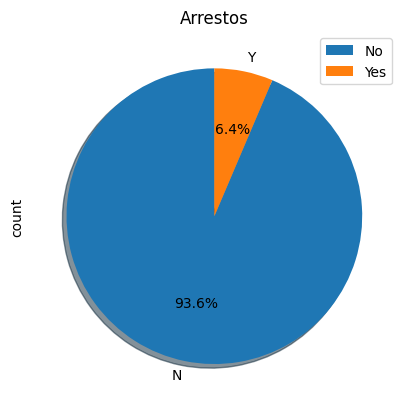

arstmade
N    11077
Y      748
Name: count, dtype: int64

count     10078
unique        2
top           N
freq       9432
Name: arstmade, dtype: object


In [19]:
# 4.- Análisis exploratorio

# 4.1 Estudie la variable respuesta por si sola (arstmade), puede ayudarse
# de un gráfico. Comente

#Gráfico de torta
df_filtrado["arstmade"].value_counts().plot(kind='pie', autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Arrestos")
#agregar leyenda
plt.legend(labels=["No", "Yes"], loc="upper right")
plt.show()

print(df["arstmade"].value_counts())
print()
print(df_filtrado["arstmade"].describe())

# La mayoria de los arrestos no se realizan

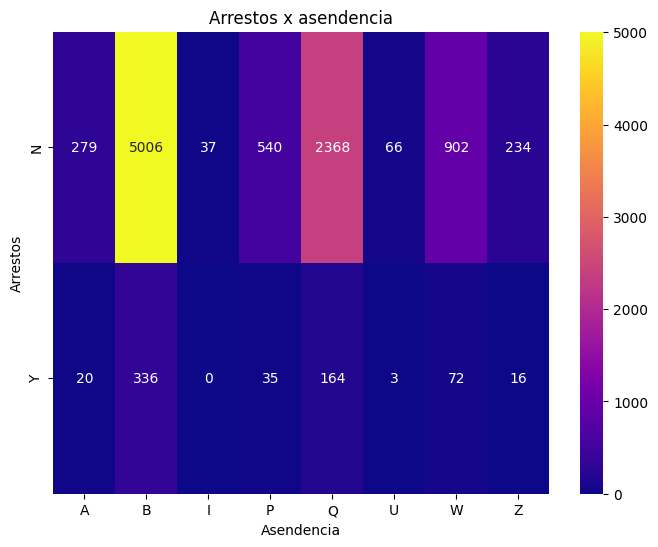

In [23]:
# 4.2.- Estudie la relación de la variable respuesta en comportamiento con la raza (race), comente.

tabla = pd.crosstab(df_filtrado['arstmade'], df_filtrado['race'])
plt.figure(figsize=(8, 6))
sns.heatmap(tabla,cmap="plasma", annot=True, fmt="d")
plt.ylabel("Arrestos")
plt.xlabel("Asendencia")
plt.title("Arrestos x asendencia")
plt.show()

## Las personas con asendencia B Q y W de manera desccendenten dominan los arrestos no realizados

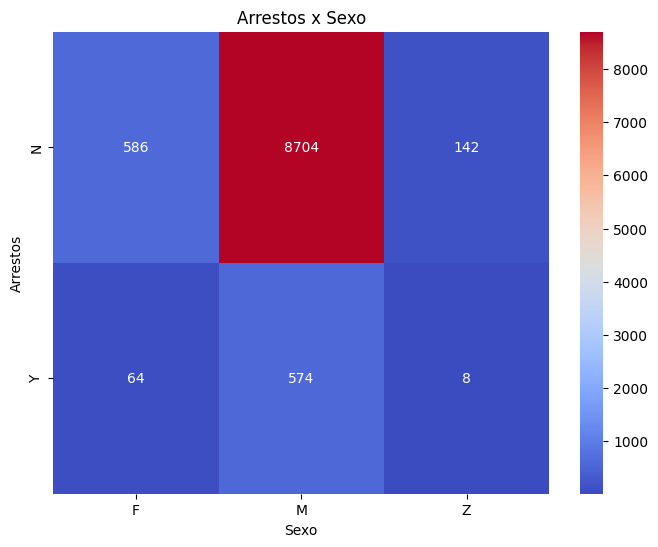

In [24]:
contingency_table = pd.crosstab(df_filtrado['arstmade'], df_filtrado['sex'])
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table,cmap="coolwarm", annot=True, fmt="d")
plt.title("Arrestos x Sexo")
plt.xlabel("Sexo")
plt.ylabel("Arrestos")
plt.show()

# El sexo masculino domina los arrestos no realizados y realizados

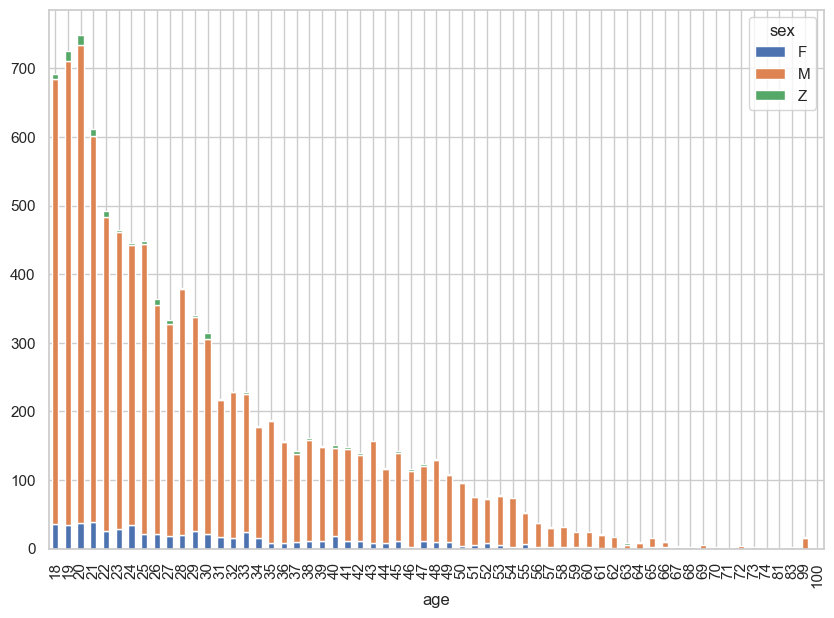

In [42]:
# 4.3 Estudie la relación de la variable respuesta en comportamiento con la
# sexo y la edad en su conjunto, comente.
# horizontal barplot 
plot = pd.crosstab(df_filtrado['age'], df_filtrado['sex']).plot(kind='bar', stacked=True, figsize=(10, 7))

# Como siempre el sexo masculino domina los arrestos

In [43]:
# 4.4 Recodifique la variable respuesta a 1 y 0. Donde 0 es N y 1 es Y

df_filtrado["arstmade"].replace("N", 0, inplace = True)
df_filtrado["arstmade"].replace("Y", 1, inplace = True)

print(df_filtrado["arstmade"].value_counts())

arstmade
0    9432
1     646
Name: count, dtype: int64


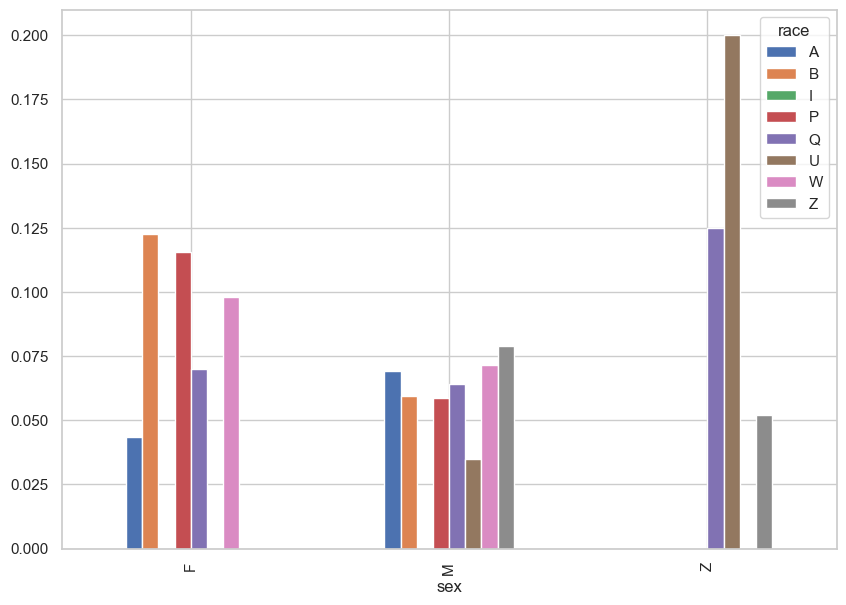

In [46]:
# 4.5 Muestre en un gráfico la probabilidad que un individuo sea
# arrestado, condicional al género y a la raza. ¿qué implicancias éticas tienen
# algunas conclusiones de lo que observa?.
# histograma de la variable respuesta



probabilities = df_filtrado.groupby(['sex', 'race'])['arstmade']

histogram = probabilities.mean().unstack().plot(kind='bar', figsize=(10, 7))

violencia
0    75.41649
1    24.58351
Name: proportion, dtype: float64


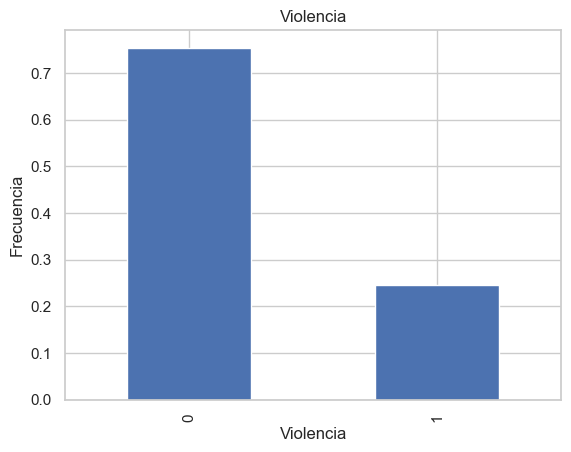

In [47]:
df["violencia"] = 0

df.loc[(df["pf_hands"] == "Y") | (df["pf_wall"] == "Y") | (df["pf_grnd"] == "Y") | (df["pf_drwep"] == "Y") | (df["pf_ptwep"] == "Y") | (df["pf_baton"] == "Y") | (df["pf_hcuff"] == "Y") | (df["pf_pepsp"] == "Y") | (df["pf_other"] == "Y"), "violencia"] = 1
print(df["violencia"].value_counts(normalize=True)*100)

# graficar
df["violencia"].value_counts(normalize=True).plot(kind="bar")
plt.title("Violencia")
plt.xlabel("Violencia")
plt.ylabel("Frecuencia")
plt.show()

# un 25% de los casos se producen con violencia


In [49]:
# 6.- Modelación
# 6.1 Genere las variables dummies correspondientes (Tenga cuidado de no
# utilizar variables que expliquen lo mismo, ¡recuerde que acaba de crear
# una variable a partir de otras!, además recuerde que creó una variable
# numérica que es una categoría :) ). Luego genere los sets de train-test
# utilizando el año 2009 para entrenar, y el año 2010 para testear.

# Genere las variables dummies
lista_dummies=[]
for item in df.columns:
    if item not in ['year', 'arstmade']:
        lista_dummies.append(item)

df_dummified = pd.get_dummies(df, columns=lista_dummies)



In [50]:
X_train = df_dummified[df_dummified["year"] == 2009].drop("arstmade", axis=1)
y_train = df_dummified[df_dummified["year"] == 2009]["arstmade"]

X_test = df_dummified[df_dummified["year"] == 2010].drop("arstmade", axis=1)
y_test = df_dummified[df_dummified["year"] == 2010]["arstmade"]

In [52]:

from sklearn.metrics import classification_report


modelo = LogisticRegression()
modelo.fit(X_train, y_train)

# prediccion
y_pred = modelo.predict(X_test)
print('Matriz de confusión: \n', confusion_matrix(y_test, y_pred))
print('Exactitud: %.2f' % accuracy_score(y_test, y_pred))
print('Reporte de clasificación: \n', classification_report(y_test, y_pred))

c:\Users\fcabello\Documents\awakelab-ejercicios\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Matriz de confusión: 
 [[5613    0]
 [   9  391]]
Exactitud: 1.00
Reporte de clasificación: 
               precision    recall  f1-score   support

           N       1.00      1.00      1.00      5613
           Y       1.00      0.98      0.99       400

    accuracy                           1.00      6013
   macro avg       1.00      0.99      0.99      6013
weighted avg       1.00      1.00      1.00      6013



In [ ]:
# para mejorar se puede hacer un gridsearch
# tambien se puede hacer un oversampling
# tambien se puede hacer un undersampling
# Normalizar los datos